In [2]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
### 1. Link notebook with google drive and access data from your personal Gdrive
url='https://drive.usercontent.google.com/u/0/uc?id=1vyQch8oLmkCOQWUOqkUVfPJ3t8mPsQVp&export=download'

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = url#insert the path here
model_loc = url#insert the path here

data = pd.read_csv(dataset_dir)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?
'''
1. Ensure the categorical variables are not treated as numerical values during subsequent data preprocessing steps.
2. Facilitating label encoding or one-hot encoding.
3. Ensuring correct data types.
4. Prevent misinterpretation of data.
'''

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [6]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

<ipython-input-6-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-6-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-6-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-6-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-6-76ef3ba0124a>:3: FutureWarning: In a future version, the In

In [7]:
### 6. Explain line 3,4 and 5 and print the shape of x and y
'''
To convert the target data into array y and drop the target column from x
'''
y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

x.shape

(303, 21)

In [8]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

from sklearn.preprocessing import MinMaxScaler

simple_dataset = pd.DataFrame({
    'a': [10, 20, 30],
    'b': [100, 200, 200],
    'c': [1000, 2000, 3000]
})
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(simple_dataset)
normalized_data = pd.DataFrame(normalized_data, columns = simple_dataset.columns)
normalized_data

,a,b,c
0,0.0,0.0,0.0
1,0.5,1.0,0.5
2,1.0,1.0,1.0


In [10]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
'''
The normalized data is between 0 to 1.
'''

minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 21)
(55, 21)
(31, 21)


In [12]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?
'''
The first Dense layer is the input layer, where it has 64 neurons, and the input to this layer has 21 features.
The activation function for this layer is 'softmax', which converts the raw output of each neuron into probabilities,
ensuring they sum up to 1. It acts as an initial layer to accept input data.

The second Dense layer is the hidden layer with 32 neurons.
The activation function is again 'softmax', which converts the raw output into probabilities.
This layer is intermediate layer between the input and output layer and process the data by applying complex non-linear
functions to them.

The third Dense layer has 1 neuron, specified by 1.
This is the output layer since it produces the final output of the model.
The activation function for this layer is 'sigmoid', which will produce output in the range of 0 to 1.
Basically, in this context, the output is the probability of the input belong to a particular class.
'''

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?
'''
mean squared error loss function:
The MSE calculates the average of the squared differences between the predicted and actual values and it quantifies
how well the model's predictions match the true target values.

Adam optimizer, learning rate 0.01:
Optimization algorithms are a type of algorithm used to find the best solution to a problem. Basicaslly, this coding
use Adam optimizer to update the model's weights based on the calculated gradients of the loss function.

accuracy:
Accuracy is computed and reported during model training, basically it is just a metrics to show for monitoring the
training process
'''

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07,
                                                 amsgrad=False,name='Adam'), metrics=['acc'])

In [14]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint("heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True,
                             mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1,
                   callbacks=callbacks_list)


Epoch 1/1000
14/14 [==============================] - 1s 25ms/step - loss: 0.2493 - acc: 0.5438 - val_loss: 0.2482 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2482 - acc: 0.5438 - val_loss: 0.2456 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2442 - acc: 0.5438 - val_loss: 0.2401 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2375 - acc: 0.5438 - val_loss: 0.2290 - val_acc: 0.5455
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2245 - acc: 0.6728 - val_loss: 0.2109 - val_acc: 0.7818
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2049 - acc: 0.8433 - val_loss: 0.1881 - val_acc: 0.8182
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1821 - acc: 0.8571 - val_loss: 0.1686 - val_acc: 0.8545
Epoch 8/1000
14/14 [==============================] - 0s 6ms/step - loss: 0

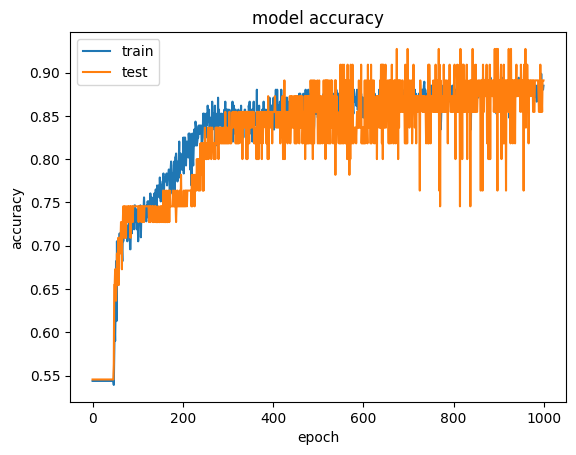

In [ ]:
### 12. What does the plot generated by this code represent?
'''
This plot represents the model's accuracy over epochs during the training process.
'''

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

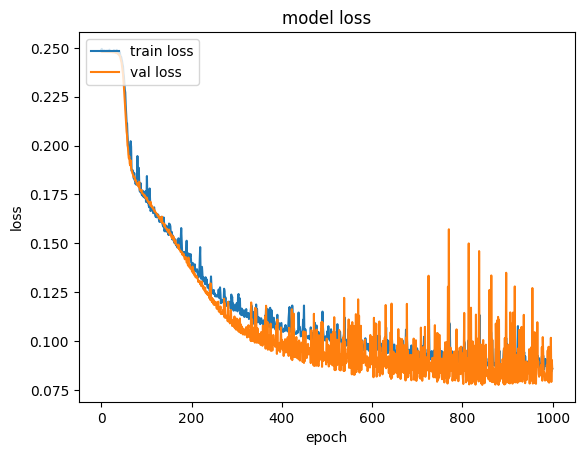

In [ ]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:
### 14. What is the purpose of evaluating the model on the test dataset?
'''
To determine the model's performance on the new data.
'''

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

1/1 [==============================] - 0s 23ms/step - loss: 0.1429 - acc: 0.8065

acc: 80.65%
loss: 0.14


In [ ]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 71ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

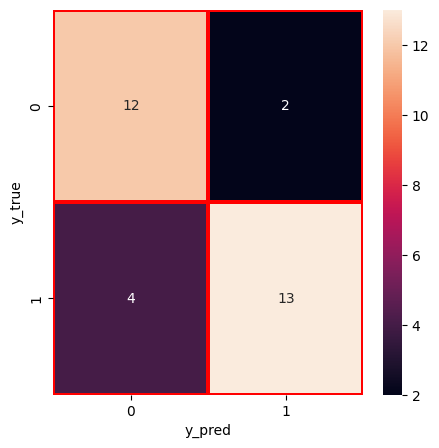


              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.87      0.76      0.81        17

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
'''
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test
data for which the true values are known. It allows visualization of the performance of an algorithm.

True Positive (TP): The number of observations that are correctly predicted to be positive by the model.
False Positive (FP): The number of observations that are incorrectly predicted to be positive by the model (they are actually negative).
False Negative (FN): The number of observations that are incorrectly predicted to be negative by the model (they are actually positive).
True Negative (TN): The number of observations that are correctly predicted to be negative by the model.
'''

### 16. Explain the classification report produce.
'''
In this specific report, there are two classes: class 0 and class 1. For class 0, the model achieved a precision of 0.75,
indicating that out of all instances predicted as class 0, 75% were correctly classified. The recall for class 0 is 0.86,
meaning that out of all actual instances of class 0, 86% were correctly classified as class 0 by the model. The F1-score
for class 0, which balances precision and recall, is 0.80. These metrics suggest a reasonably good performance for class 0.
Similarly, for class 1, the precision is 0.87, indicating that 87% of the instances predicted as class 1 were correctly
classified. The recall for class 1 is 0.76, meaning that 76% of the actual instances of class 1 were correctly classified
as class 1 by the model. The F1-score for class 1 is 0.81. These metrics collectively provide insights into the model's
ability to distinguish between the two classes. Additionally, the support values indicate the number of instances for each
class in the dataset. The overall accuracy of the model, representing the proportion of correctly classified instances out
of the total, is 0.81.
'''

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))